<a href="https://colab.research.google.com/github/Salwalabibah/PCVK_Genap_2023/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [ ]:
print("================FUNGSI KONVOLUSI=====================")

def convulution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  k_height, k_width = kernel.shape
  p_height, p_width = image.shape

  out_height = (p_height - k_height) // stride + 1
  out_width = (p_width - k_width) // stride + 1

  new_img = np.zeros((out_height, out_width)).astype(np.float32)

  for y in range(0, out_height):
    for x in range(0, out_width):
      new_img[y][x] = np.sum(image[y * stride:y * stride + k_height, x *
                                   stride:x * stride + k_width] * kernel)
  return new_img

================FUNGSI KONVOLUSI=====================


In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/img/female.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

================ SHARPEN =================


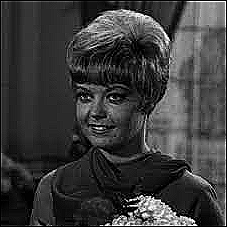

In [ ]:
print("================ SHARPEN =================")
kernel_sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

cv2_imshow(convulution2d(img_gray, kernel_sharpen, 1, 2))

================ EMBOSS =================


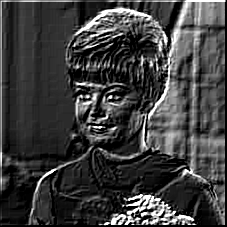

In [ ]:
print("================ EMBOSS =================")
kernel_emboss = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

cv2_imshow(convulution2d(img_gray, kernel_emboss, 1, 2))

================ LEFT SOBEL EDGE DETECTION =================


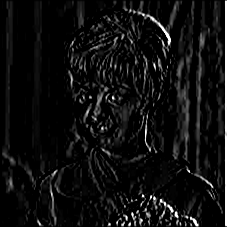

In [ ]:
print("================ LEFT SOBEL EDGE DETECTION =================")
kernel_sobel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

cv2_imshow(convulution2d(img_gray, kernel_sobel, 1, 2))

================ CANNY EDGE DETECTION =================


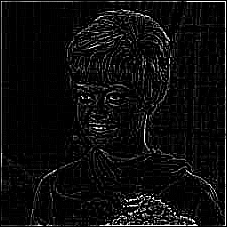

In [ ]:
print("================ CANNY EDGE DETECTION =================")
kernel_canny = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

cv2_imshow(convulution2d(img_gray, kernel_canny, 1, 2))

================ PREWITT EDGE DETECTION =================


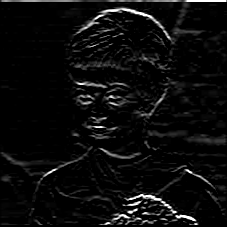

In [ ]:
print("================ PREWITT EDGE DETECTION =================")
kernel_prewitt = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

cv2_imshow(convulution2d(img_gray, kernel_prewitt, 1, 2))

================ 5x5 GAUSSIAN BLUR =================


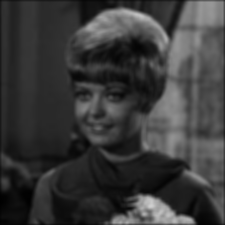

In [ ]:
print("================ 5x5 GAUSSIAN BLUR =================")

kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()
cv2_imshow(convulution2d(img_gray, gauss_kernel, 1, 2))

================ 21x21 GAUSSIAN BLUR =================


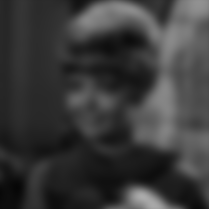

In [ ]:
print("================ 21x21 GAUSSIAN BLUR =================")

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()
cv2_imshow(convulution2d(img_gray, gauss_kernel, 1, 2))

# **Tugas**

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui
implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

In [ ]:
import os
path = "/content/drive/MyDrive/PCVK/img/KTP_More"

In [ ]:
file_ktp = [file for file in os.listdir(path) if file.lower().endswith(('.png',
                                                                        '.jpg', 'jpeg'))]
def brightness(img, val):
 img_brightness = np.zeros(img.shape, img.dtype)

 for y in range(img.shape[0]):
   for x in range(img.shape[1]):
     for c in range(img.shape[2]):
      img_brightness[y, x, c] = np.clip(img[y, x, c] + val, 0, 255)

 return img_brightness

def hist_equ(img):
  channels = cv.split(img)
  eq_channels = []

  for ch, color in zip(channels, ["r", "g", "b"]):
    eq_channels.append(cv.equalizeHist(ch))

  eq_img = cv.merge(eq_channels)

  return eq_img

def contrast(img, alpha):
  adjusted_img = cv.convertScaleAbs(img, alpha=alpha, beta=0)

  return adjusted_img



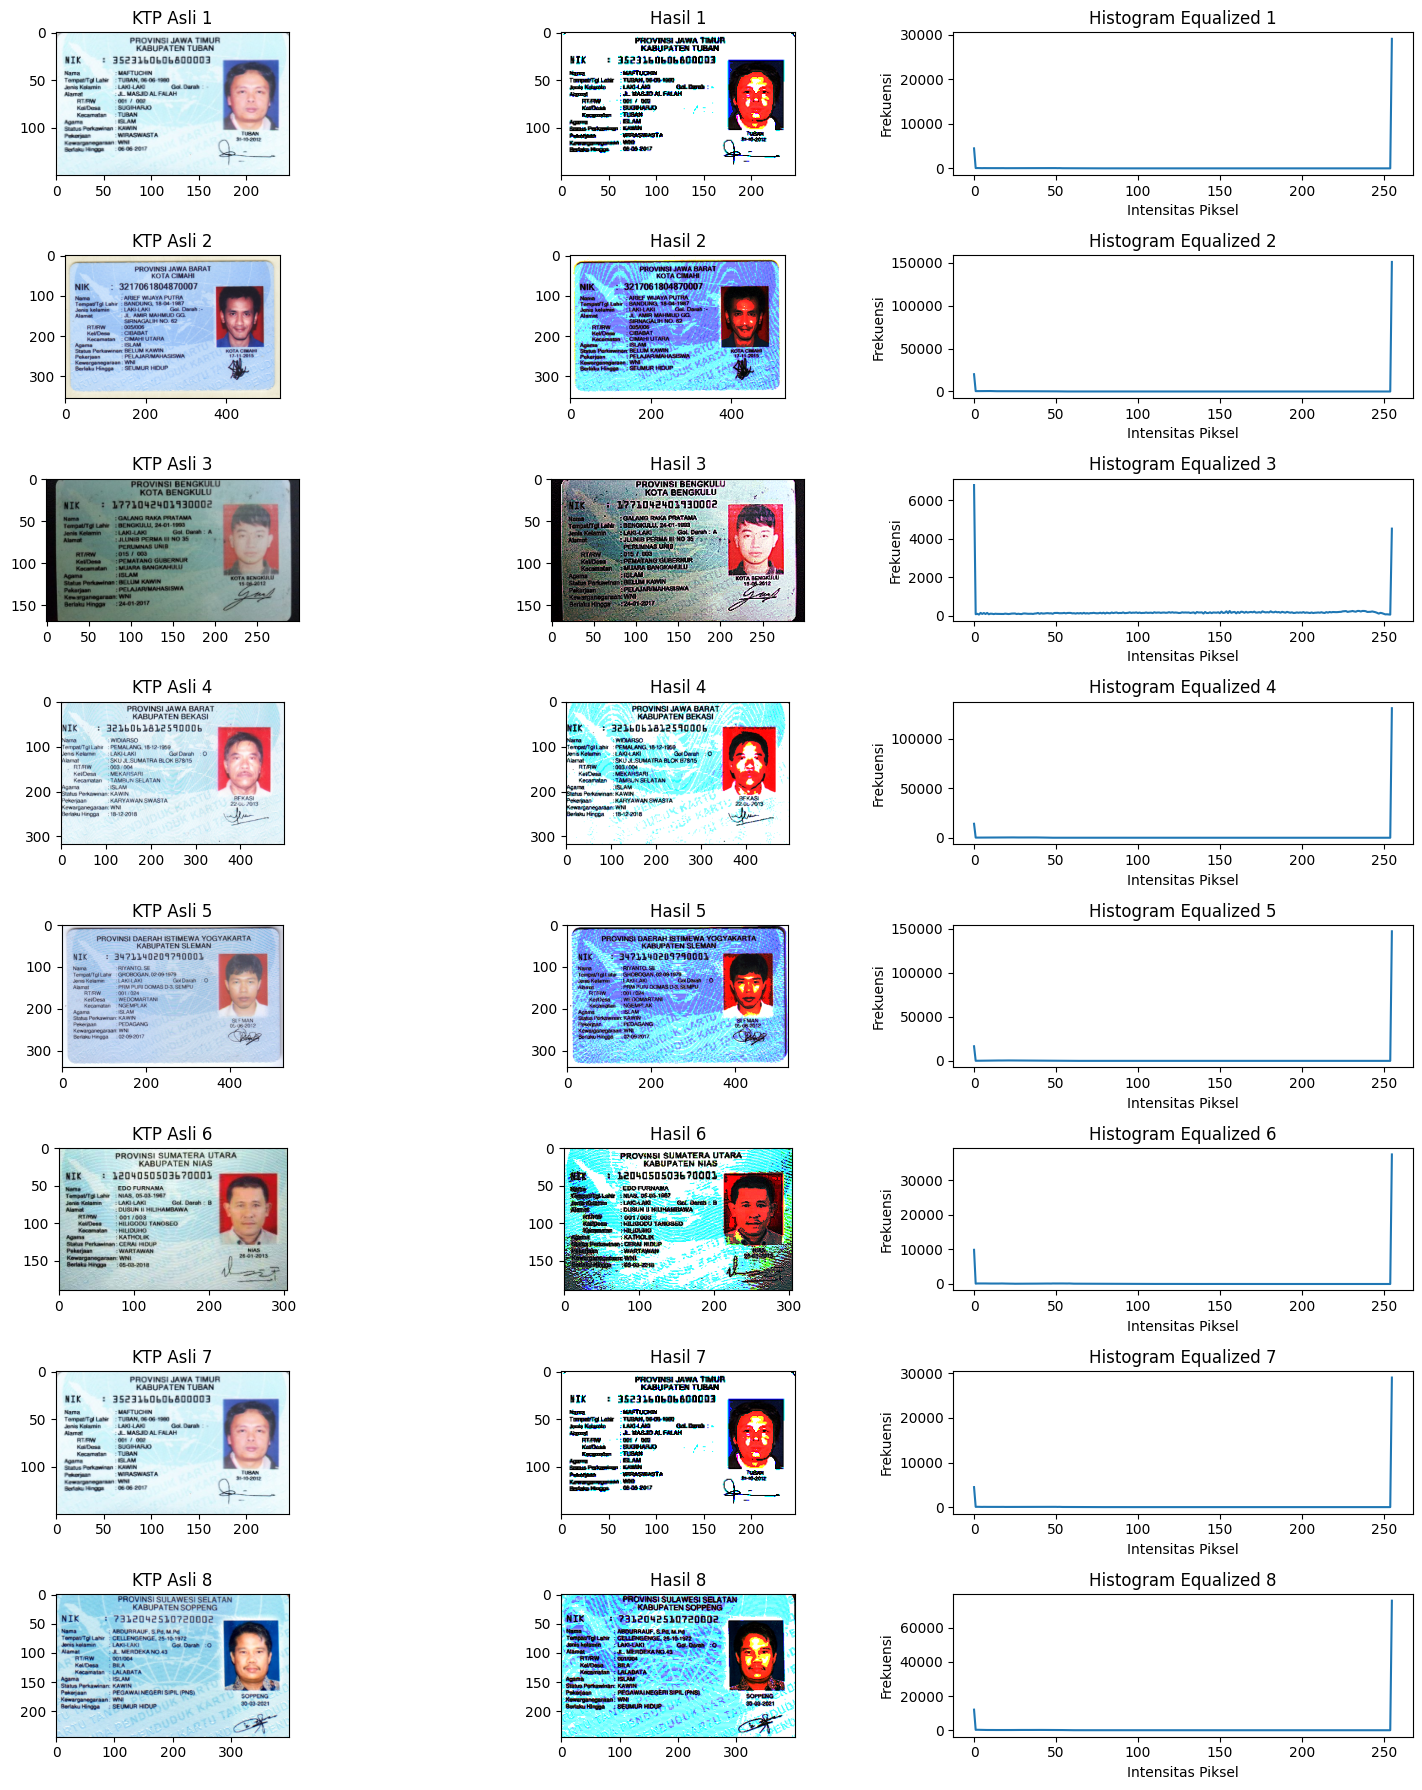

In [ ]:
# buat grid untuk menampilkan gambar
num_rows = len(file_ktp)
num_cols = 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# iterasi melalui gambar KTP
for i, file_ktp in enumerate(file_ktp):
  file_path = os.path.join(path, file_ktp)
  ktp = cv.imread(file_path)

  # Ubah ukuran gambar KTP
  ktp_resized = cv.resize(ktp, None, fx=0.5, fy=0.5)

  ktp_contrast = contrast(ktp_resized, 1.3)
  ktp_brightness = brightness(ktp_contrast, -10)
  equalized = hist_equ(ktp_brightness)
  result = cv.filter2D(equalized, -1, kernel_sharpen)

   # Tampilkan gambar asli dengan label
  axs[i, 0].imshow(cv.cvtColor(ktp_resized, cv.COLOR_BGR2RGB))
  axs[i, 0].set_title(f'KTP Asli {i+1}')

  # Tampilkan gambar yang telah diolah dengan label
  axs[i, 1].imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
  axs[i, 1].set_title(f'Hasil {i+1}')

  # Hitung histogram gambar hasil equalisasi
  equalized_histogram = cv.calcHist([result], [0], None, [256], [0, 256])

  # Tampilkan histogram pada kolom ke-4 dengan label
  axs[i, 2].plot(equalized_histogram)
  axs[i, 2].set_title(f'Histogram Equalized {i+1}')
  axs[i, 2].set_xlabel('Intensitas Piksel')
  axs[i, 2].set_ylabel('Frekuensi')

# Tampilkan hasil keseluruhan
plt.tight_layout()
plt.show()
